
<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color:aliceblue;"><b> Author:- </b> GAURAV MORE </h2>
</div>

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color:aliceblue;"><b></b> Data Science Intern at <b>OASIS INFOBYTE </h2>
</div>

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color:aliceblue;"><b> Project:- </b> Car Price Prediction </h2>
</div>

### 📚   `Data Set Information` :

> Here is the description of each variable of our **dataset** :
> - **`car_ID`** : Unique id of each observation (*Interger*)
> - **`Symboling`** : Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(*Categorical*)
> - **`carCompany`** : Name of car company (*Categorical*)
> - **`fueltype`** : car fuel type i.e gas or diesel (*Categorical*)
> - **`aspiration`** : Aspiration used in a car (*Categorical*)
> - **`doornumber`** : Number of doors in a car (*Categorical*)
> - **`carbody`** : body of car (*Categorical*)
> - **`drivewheel`** : type of drive wheel (*Categorical*)
> - **`enginelocation`** : Location of car engine (*Categorical*)
> - **`wheelbase`** : Weelbase of car (*Numeric*)
> - **`carlength`** : Length of car (*Numeric*)
> - **`carwidth`** : Width of car (*Numeric*)
> - **`carheight`** : height of car (*Numeric*)
> - **`curbweight`** : The weight of a car without occupants or baggage. (*Numeric*)
> - **`enginetype`** : Type of engine. (*Categorical*)
> - **`cylindernumber`** : cylinder placed in the car (*Categorical*)
> - **`enginesize`** : Size of car (*Numeric*)
> - **`fuelsystem`** : Fuel system of car (*Categorical*)
> - **`boreratio`** : Boreratio of car (*Numeric*)
> - **`stroke`** : Stroke or volume inside the engine (*Numeric*)
> - **`compressionratio`** : compression ratio of car (*Numeric*)
> - **`horsepower`** : Horsepower (*Numeric*)
> - **`peakrpm`** : car peak rpm (*Numeric*)
> - **`citympg`** : Mileage in city (*Numeric*)
> - **`highwaympg`** : Mileage on highway (*Numeric*)
> - **`price(Dependent variable)`** : Price of car (*Numeric*)

Dataset Source : https://archive.ics.uci.edu/ml/datasets/Automobile

### 🤔   `What wee'll do` :

> 📖 **`Reading the data`**

> 🧹 **`Data Cleaning`**
> -   **`Dealing with duplicates`** .
> -   **`Dealing with Non significant columns`** .

> 🌇 **`Exploring columns`**

> 📈  **`Data Visulaization`**
> -   **`Some deductions`** .

> 👩‍🍳  **`Data Preparation`**
> -   **`Spliting the data into test and train`** .
> -   **`Rescaling the data`** .

> 🏢  **`Model building`**
> -   **`Model building using LinearRegression`**.
>  -   **`Evaluating the LinearRegression Model`**.
> -   **`Model building using RFE`**.





In [1]:
# Importing all libraries :

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
from sklearn.feature_selection import RFE
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
sns.set(rc={'figure.figsize':(8,8)})

### 📖 `Reading the data` :

In [2]:
car = pd.read_csv(r"C:\Users\Admin\Downloads\Osis Infobyte\Task 3\carPrice.csv")
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Shape of the data :
car.shape

(205, 26)

In [4]:
# Dataframe information :
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

> Good news so far 😊, there are no more missing values in our dataset.

In [5]:
# Describing the data :
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

> Seems like our dataset is already processed 🤩

### 🧹 `Data Cleaning` :

> 1️⃣  **`Dealing with duplicates`** :

In [7]:
car.duplicated(subset = ['car_ID']).sum()

0

> Good news again 😁, there are no duplicates in our dataset.

> 2️⃣  **`Dealing with Non significant columns`** :

In [8]:
car = car.drop(['car_ID'], axis =1) # Index column is an insignificant column.

### 🌇 `Exploring columns` :

In [9]:
# Exploring Column carName :
car['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

> We see that "**carName**" is comprised of two parts :
> - The first word is the name of **car company**.
> - The second is the **car model**.

In [10]:
# We create a new column "car_company" in our dataset :
car['car_company'] = car['CarName'].apply(lambda x:x.split(' ')[0])

In [11]:
# Rechecking :
car['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

> We can see some **spelling mistakes** in the data.

In [12]:
# Deleting the original column :
car = car.drop(['CarName'], axis =1)

In [13]:
car['car_company'].replace('toyouta', 'toyota',inplace=True)
car['car_company'].replace('Nissan', 'nissan',inplace=True)
car['car_company'].replace('maxda', 'mazda',inplace=True)
car['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
car['car_company'].replace('vw', 'volkswagen',inplace=True)
car['car_company'].replace('porcshce', 'porsche',inplace=True)

In [14]:
# Rechecking the data:
car['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

> See the **Spelling Mistake** has been resolved.

In [15]:
car['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

> - **`fueltype`** : car fuel type i.e gas or diesel

In [16]:
car['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

> - **`aspiration`** : Aspiration used in a car

#### ❓ `Some explanations` :
> - **`What is aspiration std?`** : A naturally aspirated engine, also known as a normally aspirated engine or NA, is an internal combustion engine in which air intake depends solely on atmospheric pressure and does not have forced induction through a turbocharger or a supercharger.

> - **`What is aspiration turbo?`** : A naturally aspirated engine is an internal combustion engine in which the air intake relies solely on atmospheric pressure, which is the exact opposite of the force induction turbocharged engines use.

In [17]:
car['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

> - **`doornumber`** : Number of doors in a car

In [18]:
car[['doornumber']].head()

,doornumber
0,two
1,two
2,two
3,four
4,four


> As there are **numbers**, let us **convert** these numbers into **numeric form** :

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
car.doornumber = car.doornumber.replace({'four':4,'two':2})

In [21]:
car[['doornumber']].head()

,doornumber
0,2
1,2
2,2
3,4
4,4


In [22]:
car['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

> - **`carbody`** : body of car

In [23]:
car['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

> - **`drivewheel`** : type of drive wheel

In [24]:
car['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

only 3 cars with rear engines. we can drop this feature.

> - **`enginelocation`** : Location of car engine

In [25]:
car['wheelbase'].value_counts().head()

94.5    21
93.7    20
95.7    13
96.5     8
97.3     7
Name: wheelbase, dtype: int64

> - **`wheelbase`** : Weelbase of car

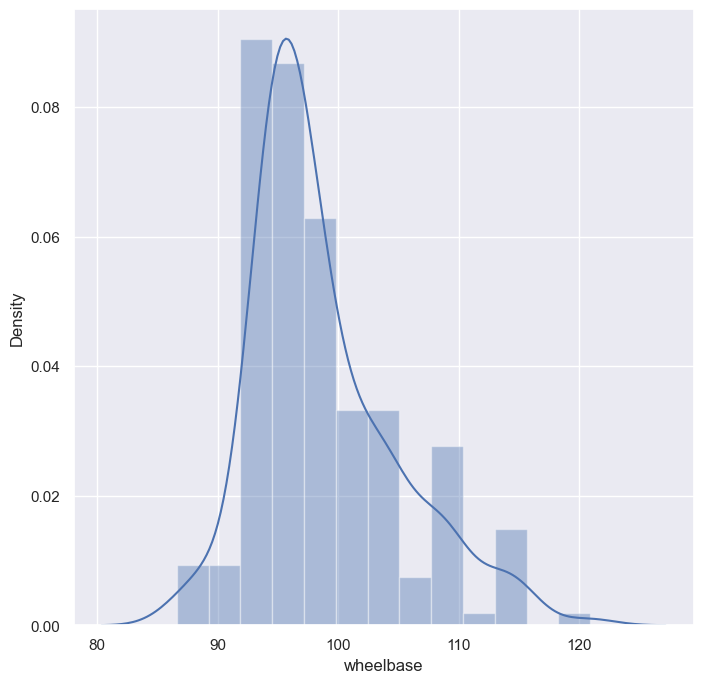

In [26]:
sns.distplot(car['wheelbase'])
plt.show()

In [27]:
car['carlength'].value_counts().head()

157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
Name: carlength, dtype: int64

> - **`carlength`** : Length of car

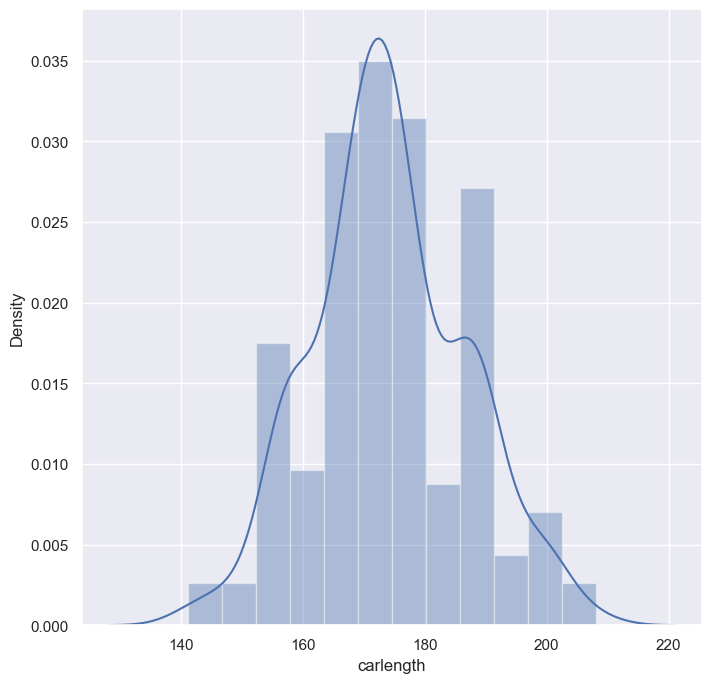

In [28]:
sns.distplot(car['carlength'])
plt.show()

> - **`enginetype`** : Type of engine.

> ☝️ As there are **numbers**, let us **convert** these numbers into **numeric form** :

In [29]:
car['cylindernumber'].head()

0    four
1    four
2     six
3    four
4    five
Name: cylindernumber, dtype: object

In [30]:
car.cylindernumber = car.cylindernumber.replace({'four': 4,'six': 6,'five': 5,'eight': 8,'two': 2,'three': 3,'twelve': 12})

car['cylindernumber'].head()

0    4
1    4
2    6
3    4
4    5
Name: cylindernumber, dtype: int64

> 😊 Now, we have almost looked into most of the column individually. Now let us explore data visulaization to look for any patterns.

### 📈 `Data Visulaization` :

In [31]:
cars_numeric = car.select_dtypes(include =['int64','float64'])
cars_numeric.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


> ❓ **`Correlation matrix`** is a table showing **correlation coefficients between variables**. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.
> - The **magnitude of the correlation coefficient** *indicates* the **strength of the association**. For example, a correlation of **`r = 0.9`**  suggests a **`strong`** , positive association between two variables, whereas a correlation of **`r = -0.2`**  suggest a **`weak`** , negative association.

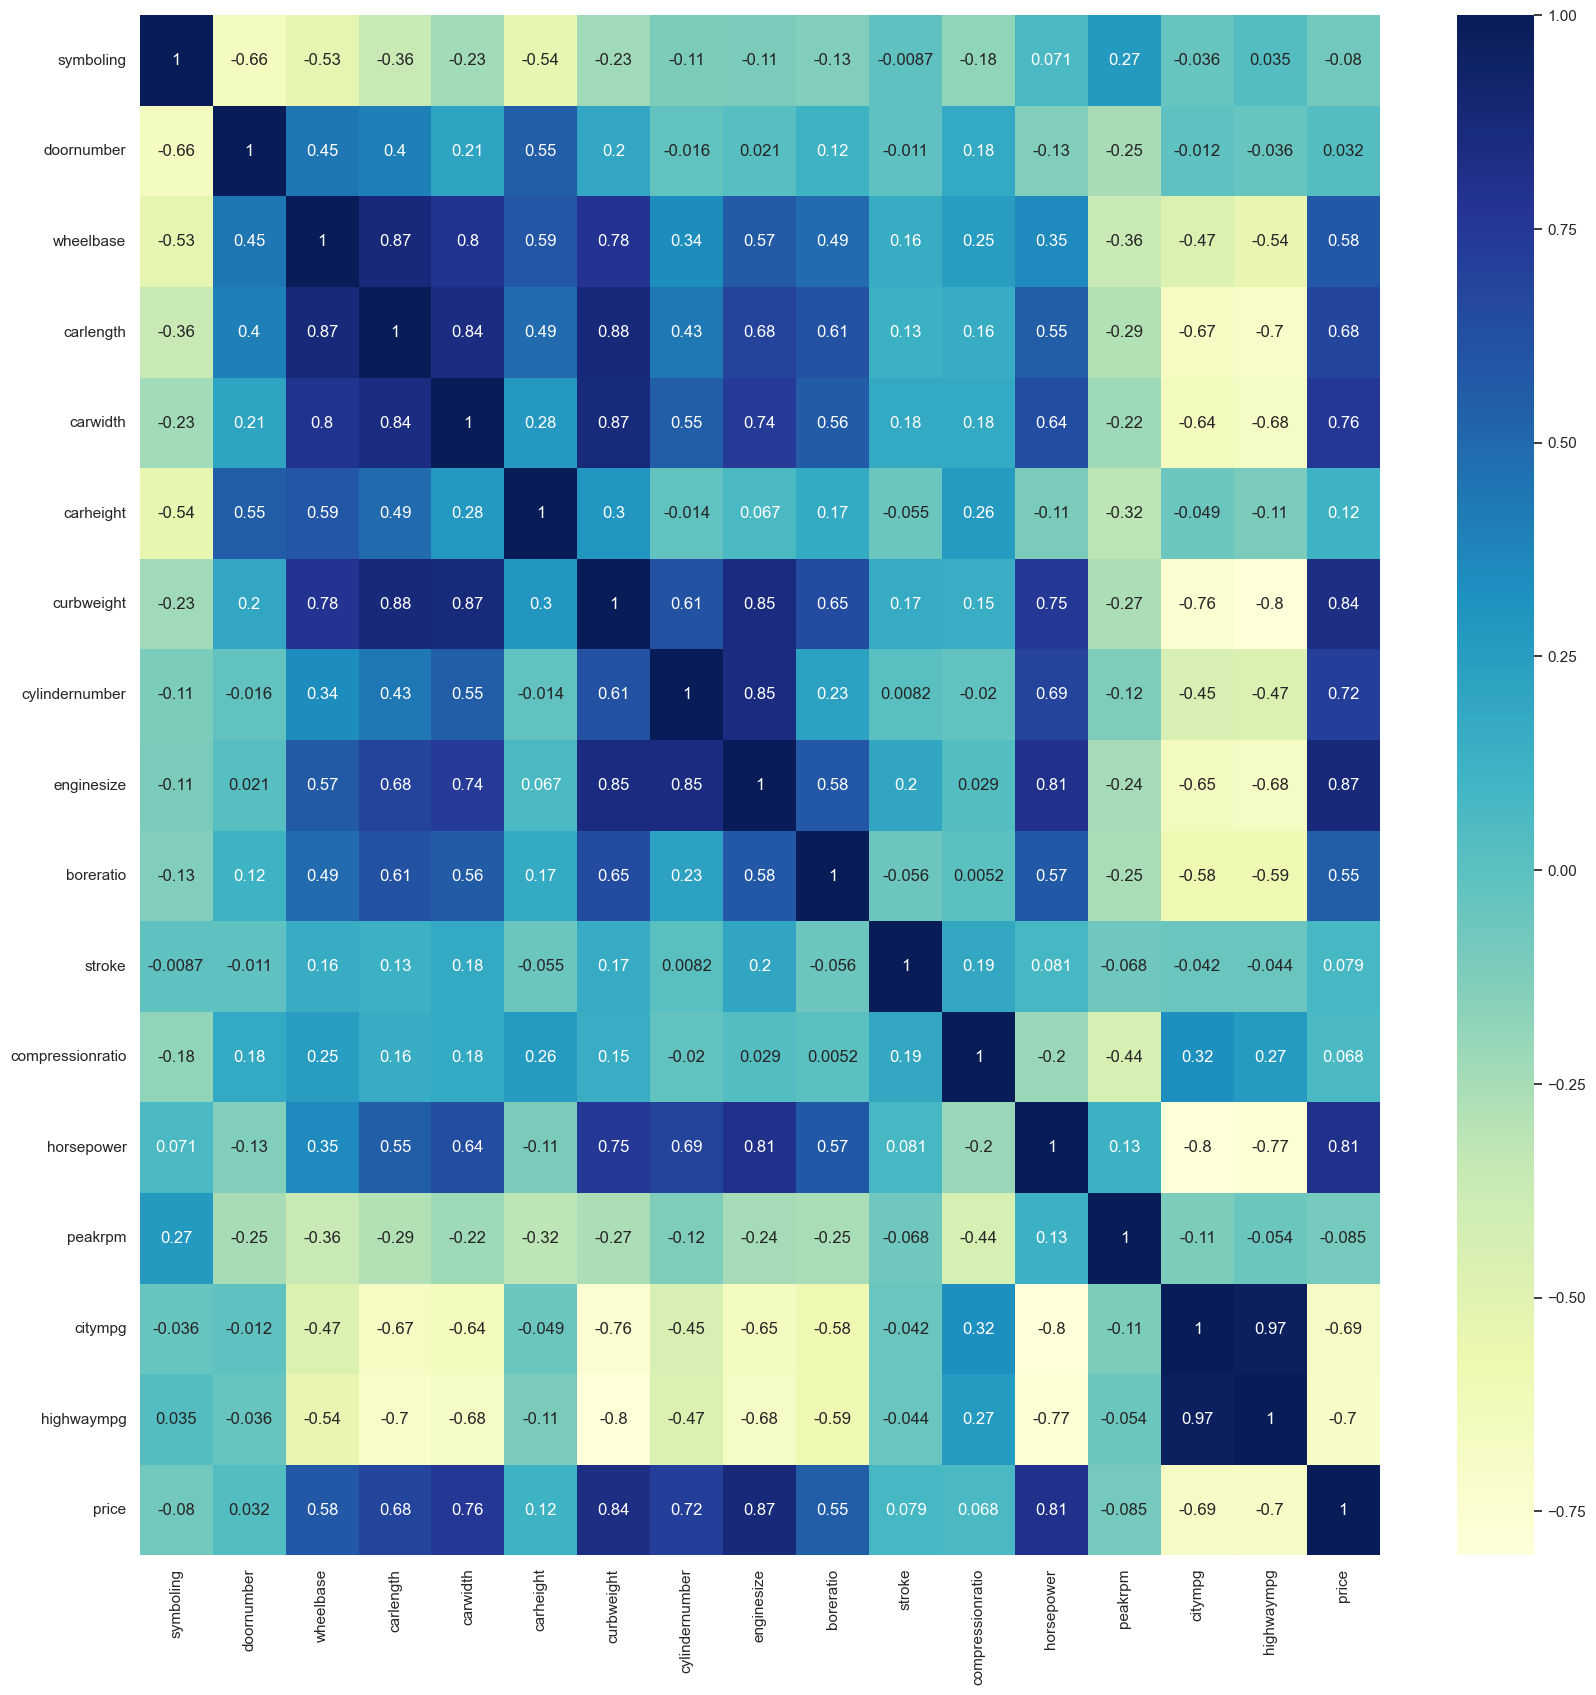

In [32]:
plt.figure(figsize = (20,20))
sns.heatmap(car.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

> - **`Price`** is **highly** (positively) **correlated** with **`wheelbase`**, **`carlength`**, **`carwidth`**, **`curbweight`**, **`enginesize`**, **`horsepower`**.

> - There are *many* independent *variables* which are highly correlated: **`wheelbase`**, **`carlength`**, **`curbweight`**, **`enginesize`** etc.. all are **positively correlated**.

> - 💡 **`Price`** is **negatively correlated** to **`symboling`**, **`citympg`** and **`highwaympg`**. This suggests that cars with **high mileage** may belong to the category of **"economy cars"** and are less expensive.

In [33]:
car['brand'] = car.car_company.str.split(' ').str.get(0).str.upper()

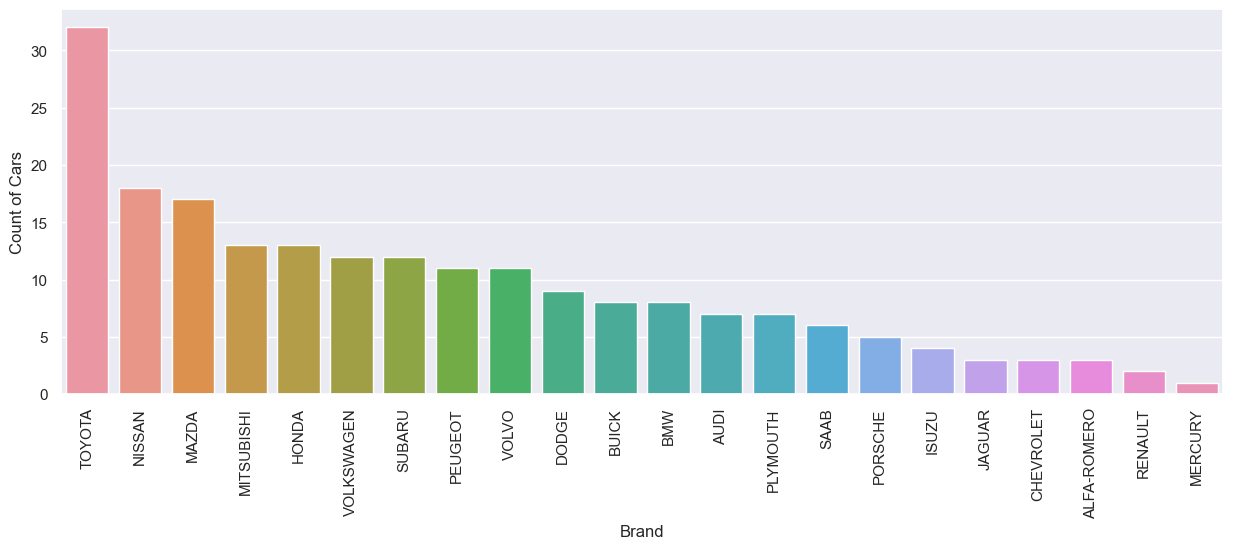

<Figure size 800x800 with 0 Axes>

In [34]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(car['brand'], order=pd.value_counts(car['brand']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
xticks(rotation = 90)
plt.show()
plt.tight_layout()

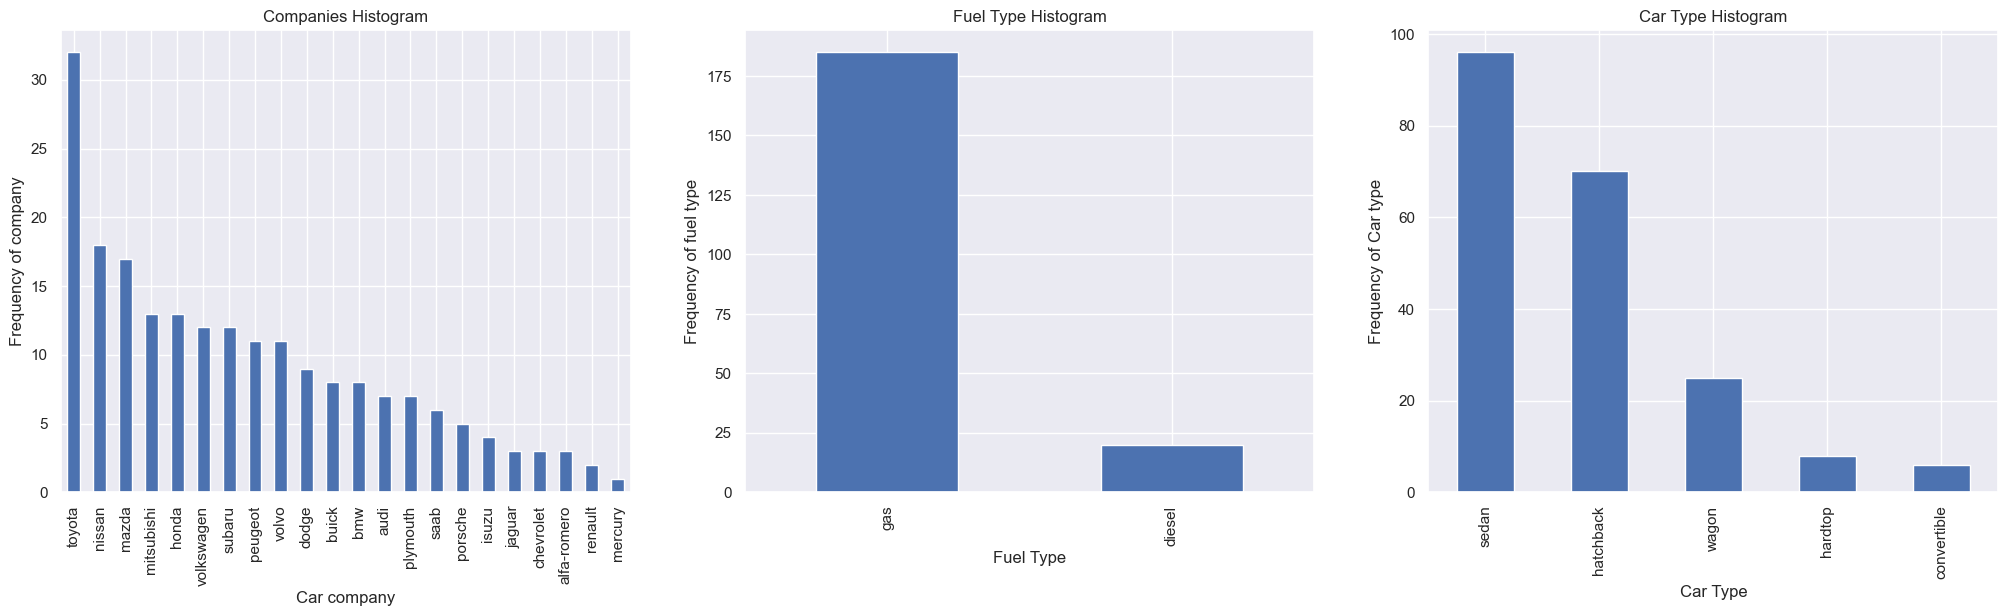

In [35]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = car.car_company.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = car.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = car.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

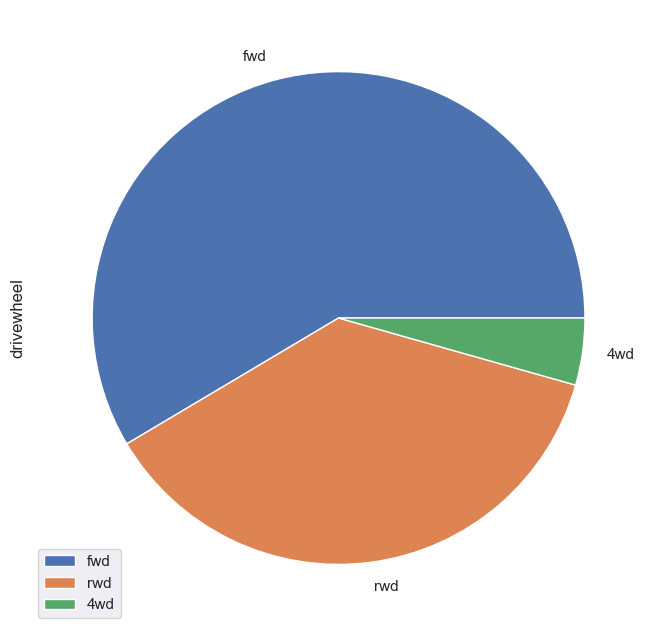

In [36]:
df = pd.DataFrame(car['drivewheel'].value_counts())
plot = df.plot.pie(y='drivewheel', figsize=(8, 8))

* Maximum cars has fwd drive wheel

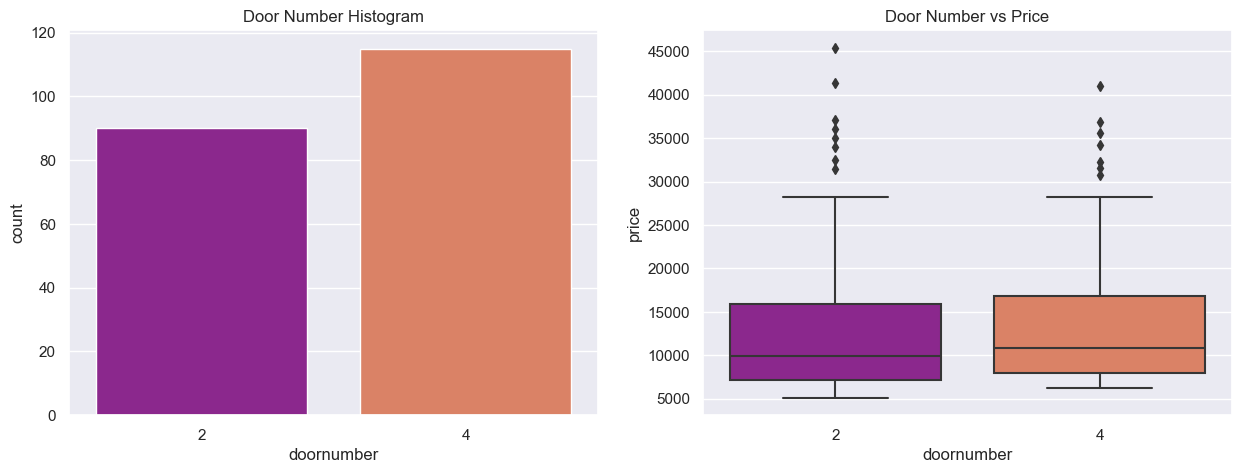

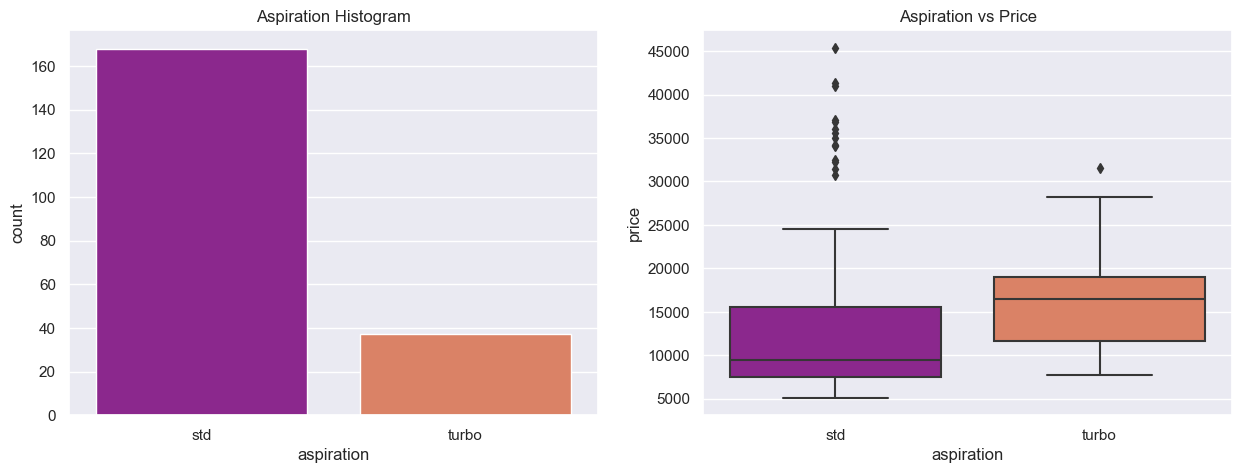

In [37]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(car.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=car.doornumber, y=car.price, palette=("plasma"))
plt.show()

#--------------------------------------------------------------------------------------------------

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(car.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=car.aspiration, y=car.price, palette=("plasma"))
plt.show()

#### Inference :

1. `doornumber` variable is not affacting the price much. There is no sugnificant difference between the categories in it.
2. It seems aspiration with `turbo` have higher price range than the `std`(though it has some high values outside the whiskers.)

<AxesSubplot:xlabel='car_company', ylabel='price'>

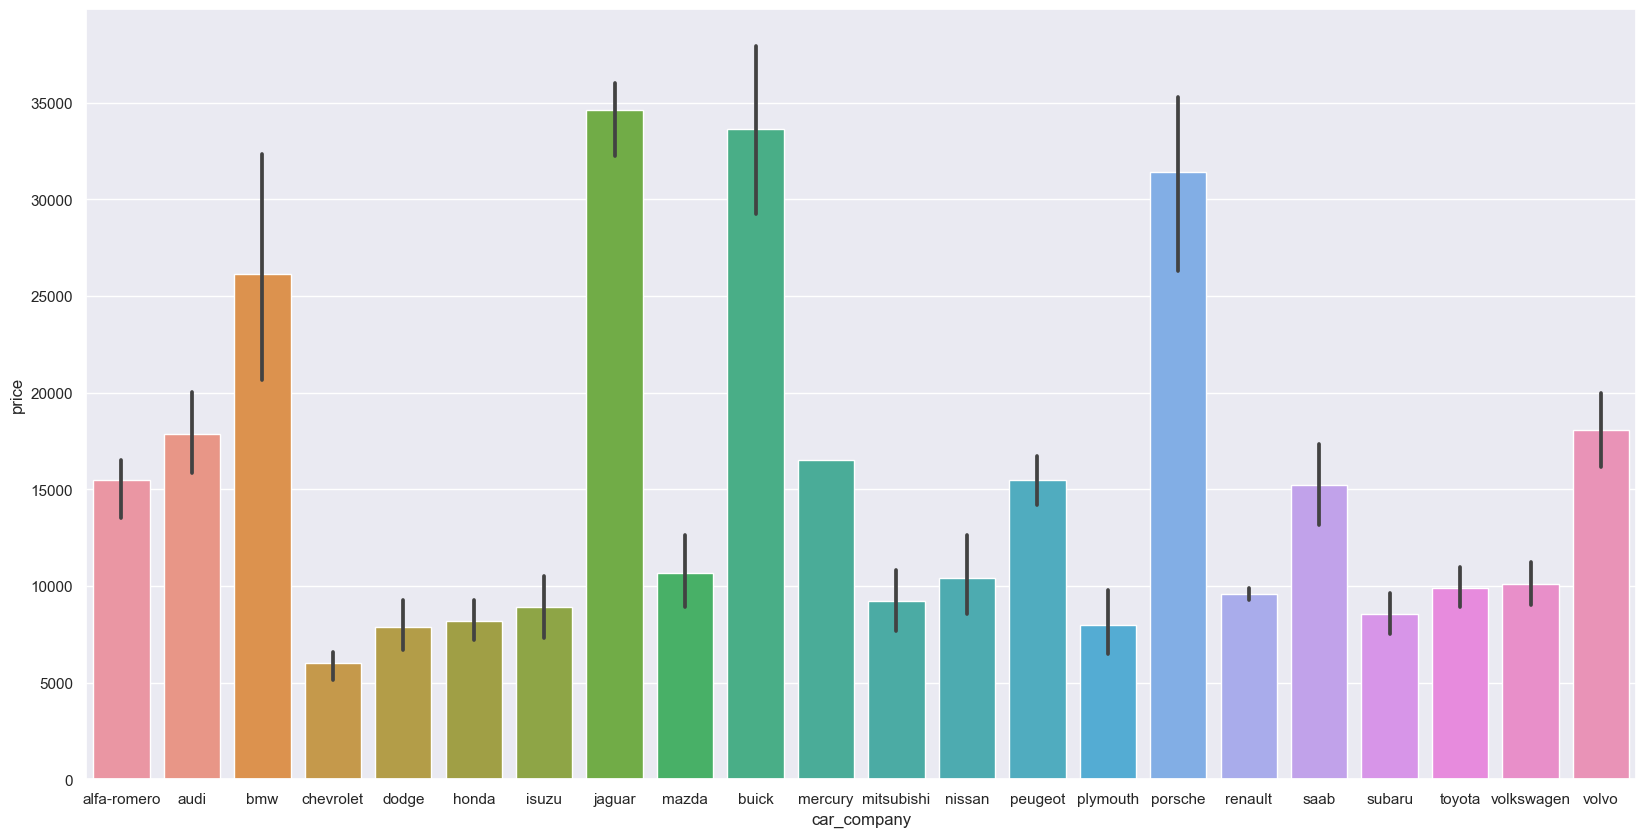

In [38]:
plt.figure(figsize=(20, 10))
sns.barplot(x='car_company', y='price', data=car)

###  `Some deductions` :
> - From the **`price boxplot`** it is clear that The **brands** with the **most expensive vehicles** in the dataset belong to **Bmw**, **Buick**, **Jaguar** and **porsche**.

> - Whereas the **lower priced** cars belong to **chevrolet**.

> - The **median price** of **gas** vehicles is lower than that of **Diesel** Vehicles.

> - **75th percentile** of standard **aspirated** vehicles have a **price lower** than the **median price** of **turbo** aspirated vehicles.

> - **two** and **four** Door vehicles are almost **equally priced**. There are however some outliers in the price of two-door vehicles.

> - **Hatchback** vehicles have the **lowest median price** of vehicles in the data set whereas **hardtop** vehicles have the **highest** median price.

> - Almost all vehicles in the dataset have engines placed in the front of the vehicle. However, the price of vehicles with **rear placed engines** is significantly **higher** than the price of vehicles with **front placed engines**.

> The **median cost** of **eight cylinder** vehicles is **higher** than other cylinder categories.

> It is clear that vehicles **Multi-port Fuel Injection** fuelsystem have the **highest median price**. There are also some outliers on the **higher price** side having **MPFI systems**.

> Vehicles with **OHCV engine** type falls **under higher price range**.

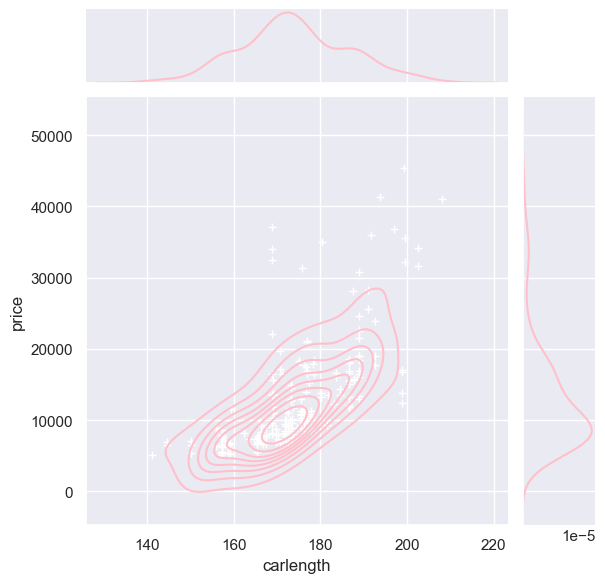

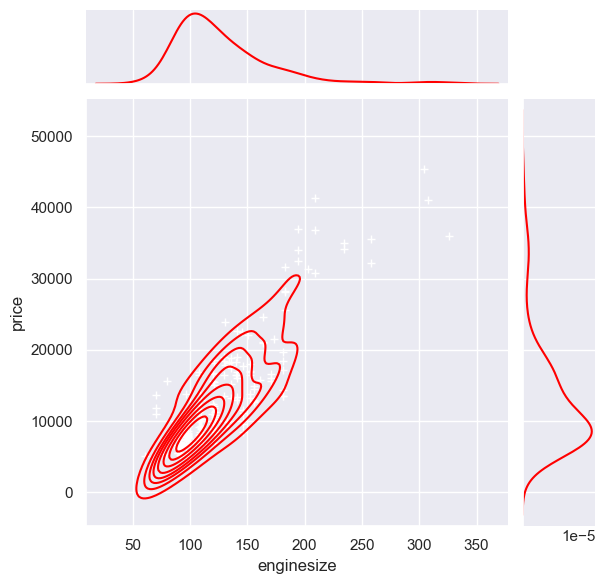

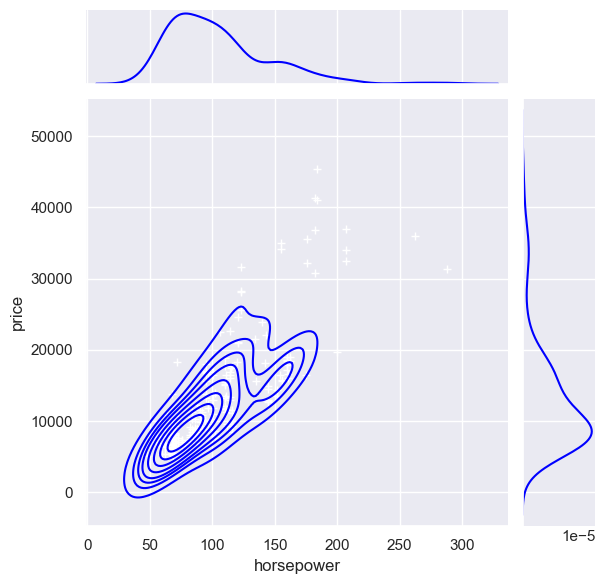

In [39]:
variables = [("carlength", "pink"), ("enginesize", "red"), ("horsepower", "blue")]

for var, color in variables:
    g = sns.jointplot(x=var, y="price", data=car, kind="kde", color=color)
    g.plot_joint(plt.scatter, c="white", s=30, linewidth=1, marker="+")
    g.ax_joint.collections[0].set_alpha(0)
    g.set_axis_labels(var, "price")

plt.show()

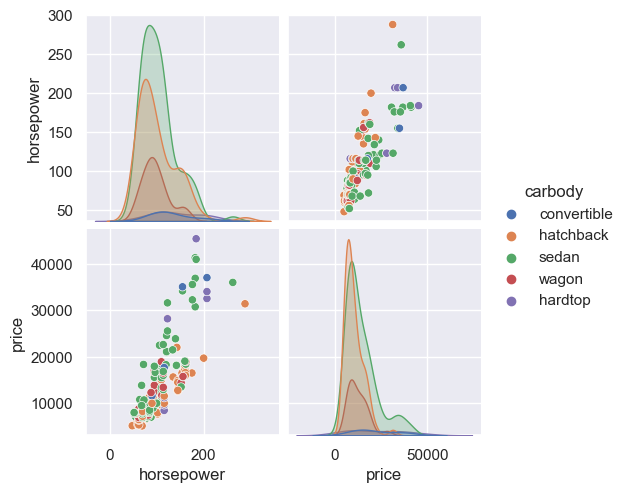

In [40]:
sns.pairplot(car[['horsepower','price','carbody']], hue="carbody");

Text(0.5, 1.0, 'Distribution of ages of diesel vehicles')

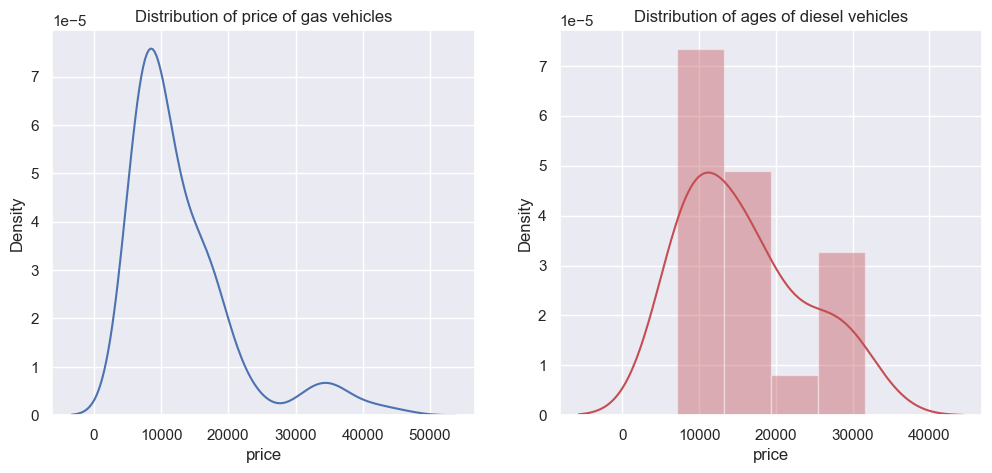

In [41]:
# Price distribution of diesel vs gas car

f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.kdeplot(car[(car.fueltype== 'gas')]["price"],color='b',ax=ax)
ax.set_title('Distribution of price of gas vehicles')

ax=f.add_subplot(122)
sns.distplot(car[(car.fueltype == 'diesel')]['price'],color='r',ax=ax)
ax.set_title('Distribution of ages of diesel vehicles')

In [42]:
### Step 5 : Bivariate Analysis

In [43]:
#Fuel economy
car['fueleconomy'] = (0.55 * car['citympg']) + (0.45 * car['highwaympg'])

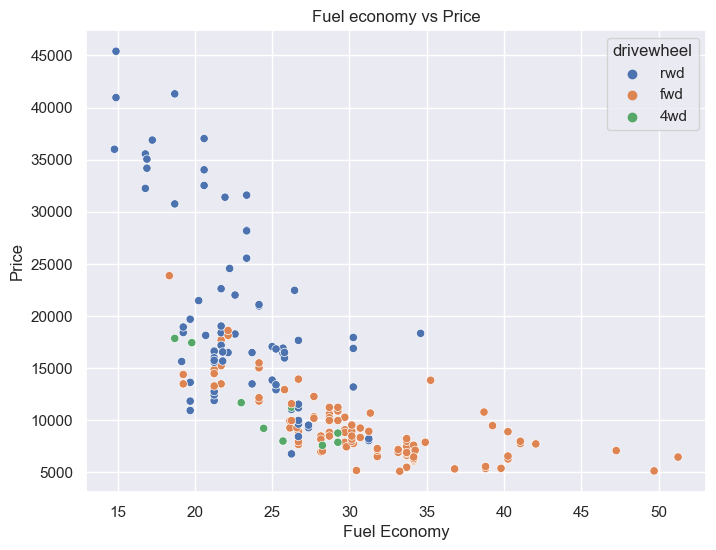

<Figure size 800x800 with 0 Axes>

In [44]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=car['fueleconomy'],y=car['price'],hue=car['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

#### Inference :

1. `fueleconomy` has an obvios `negative correlation` with price and is significant.

In [46]:
categorical_cols = car.select_dtypes(include=['object'])
categorical_cols.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,car_company,brand
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero,ALFA-ROMERO
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero,ALFA-ROMERO
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero,ALFA-ROMERO
3,gas,std,sedan,fwd,front,ohc,mpfi,audi,AUDI
4,gas,std,sedan,4wd,front,ohc,mpfi,audi,AUDI


<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

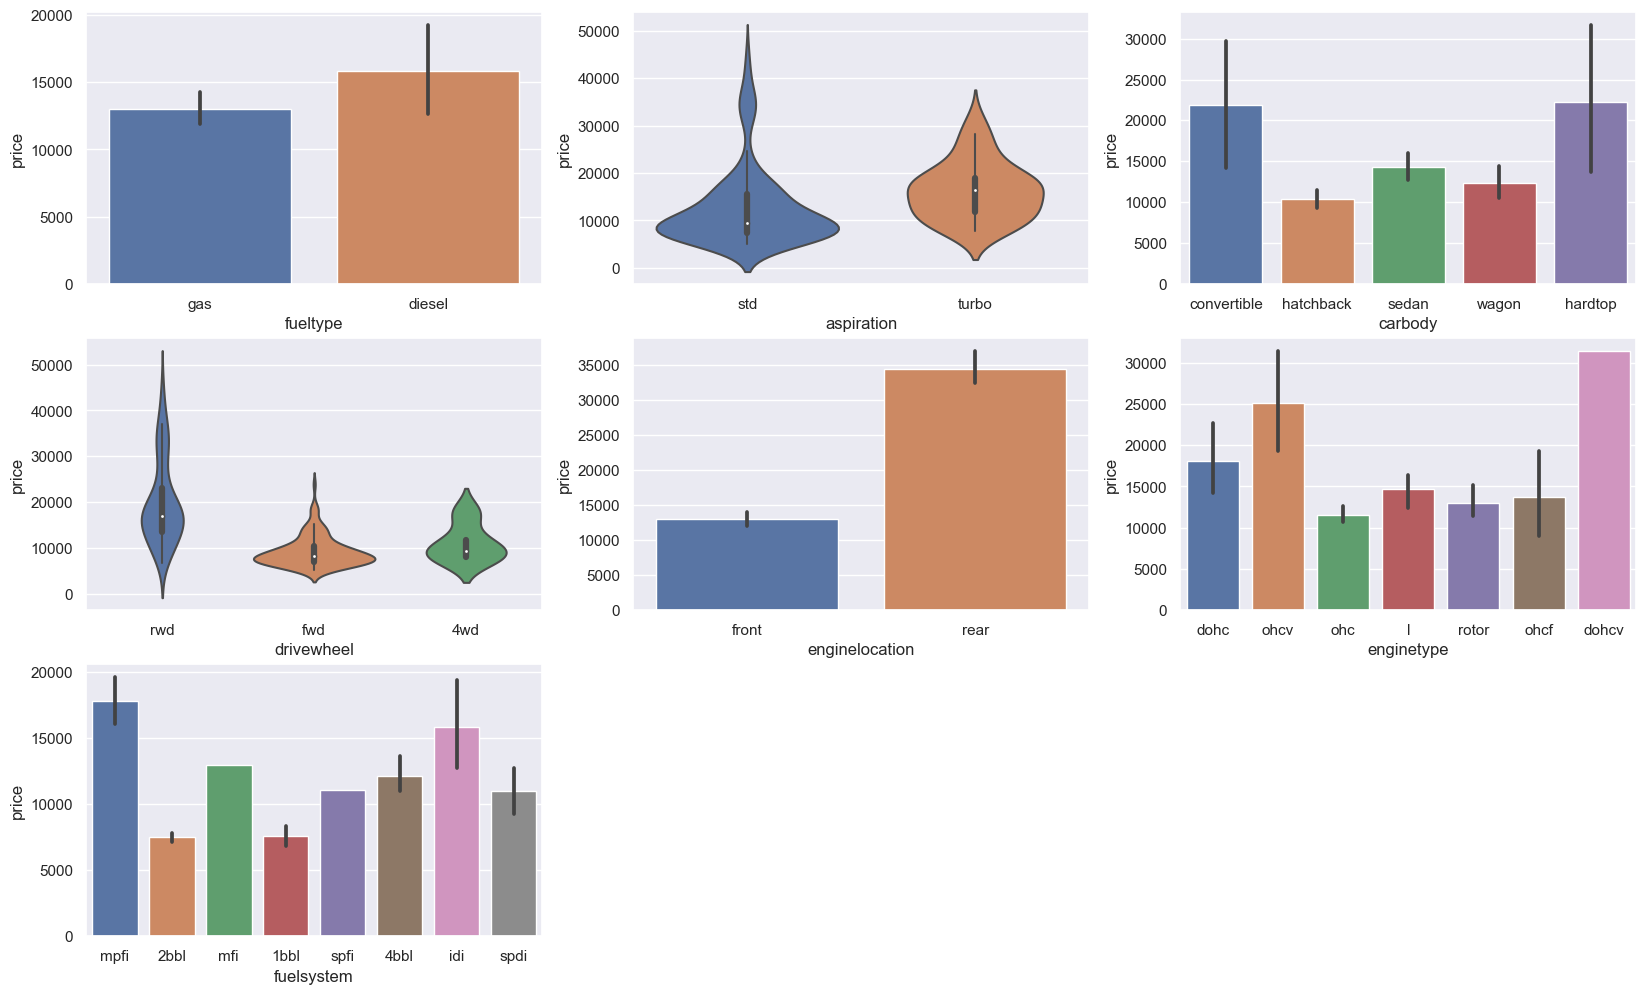

In [47]:
plt.figure(figsize=(20, 12))

plt.subplot(3, 3, 1) # 3 rows, 3 columns, 1st subplot = left
sns.barplot(x='fueltype', y='price', data=car)

plt.subplot(3, 3, 2) # 3 rows, 3 columns, 2nd subplot = middle
sns.violinplot(x='aspiration', y='price', data=car)

plt.subplot(3, 3, 3) # 3 rows, 3 columns, 3rd subplot = right
sns.barplot(x='carbody', y='price', data=car)

plt.subplot(3, 3, 4)
sns.violinplot(x='drivewheel', y='price', data=car)

plt.subplot(3, 3, 5)
sns.barplot(x='enginelocation', y='price', data=car)

plt.subplot(3, 3, 6)
sns.barplot(x='enginetype', y='price', data=car)

plt.subplot(3, 3, 7)
sns.barplot(x='fuelsystem', y='price', data=car)

### 👩‍🍳 `Data Preparation` :

> - **`One-hot encoding`** is an important step for preparing our dataset for use in machine learning. **One-hot encoding** `turns your categorical data into a binary vector representation`. Pandas get dummies makes this very easy!                      
>     - This means that for each unique value in a column, a new column is created. The values in this column are represented as 1s and 0s, depending on whether the value matches the column header.
>     - For example, with the help of the **`get_dummies`** function, we turn this table below :
>      <table>
    <tbody>
        <tr>
            <td><b>Gender</b></td>
        </tr>
        <tr>
            <td>Male</td>
        </tr>
        <tr>
            <td>Female</td>
        </tr>
        <tr>
            <td>Male</td>
        </tr>
        <tr>
            <td>Male</td>
        </tr>
    </tbody>
> </table>

>    - To this :
>      <table>
    <tbody>
        <tr>
            <td><b>Gender</b></td>
            <td><b>Male</b></td>
            <td><b>Female</b></td>
        </tr>
        <tr>
            <td>Male</td>
            <td>1</td>
            <td>0</td>
        </tr>
        <tr>
            <td>Female</td>
            <td>0</td>
            <td>1</td>
        </tr>
        <tr>
            <td>Male</td>
            <td>1</td>
            <td>0</td>
        </tr>
        <tr>
            <td>Male</td>
            <td>1</td>
            <td>0</td>
        </tr>
    </tbody>
</table>

### 🏢 `Model building` :

> 1️⃣  **`Model building using LinearRegression`** :

<font size="+3" color='#540b11'><b>3. Feature Selection </b></font>

Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV

In [49]:
numerical_cols=car.select_dtypes(exclude=['object']).columns

In [50]:
X=car[numerical_cols].drop('price',axis=1)
y=car['price']

# Recursive feature elimination (RFE) with random forest

In [51]:
X = car.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
X=X.drop(['car_company','price'],axis=1)
y=car['price']

In [52]:
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=15, step=1)
rfe = rfe.fit(X, y)
print('Chosen best 15 feature by rfe:',X.columns[rfe.support_])

Chosen best 15 feature by rfe: Index(['carbody', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'highwaympg', 'brand', 'fueleconomy'],
      dtype='object')


In [53]:
features=list(X.columns[rfe.support_])

<font size="+3" color='#540b11'><b>4. Data Modelling and Evaluation </b></font>

In [55]:
x = X[features]
y = car.price
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

# Linear Regression

In [56]:
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_train_pred = lreg.predict(x_train)
y_test_pred = lreg.predict(x_test)
lreg.score(x_test,y_test)

0.8058595732073851

# Decision Tree Regressor

In [57]:
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train,y_train)
y_train_pred = dt_regressor.predict(x_train)
y_test_pred = dt_regressor.predict(x_test)
dt_regressor.score(x_test,y_test)

0.8670037785642148

# Random Forest regressor

In [58]:
Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'squared_error',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(x_train,y_train)
Rf_train_pred = Rf.predict(x_train)
Rf_test_pred = Rf.predict(x_test)


r2_score(y_test,Rf_test_pred)

0.9090435095966738

In [70]:
## Model Evaluation

from sklearn.metrics import r2_score 
r2_score(y_test, Rf_test_pred)

0.9090435095966738

Text(0, 0.5, 'y_pred')

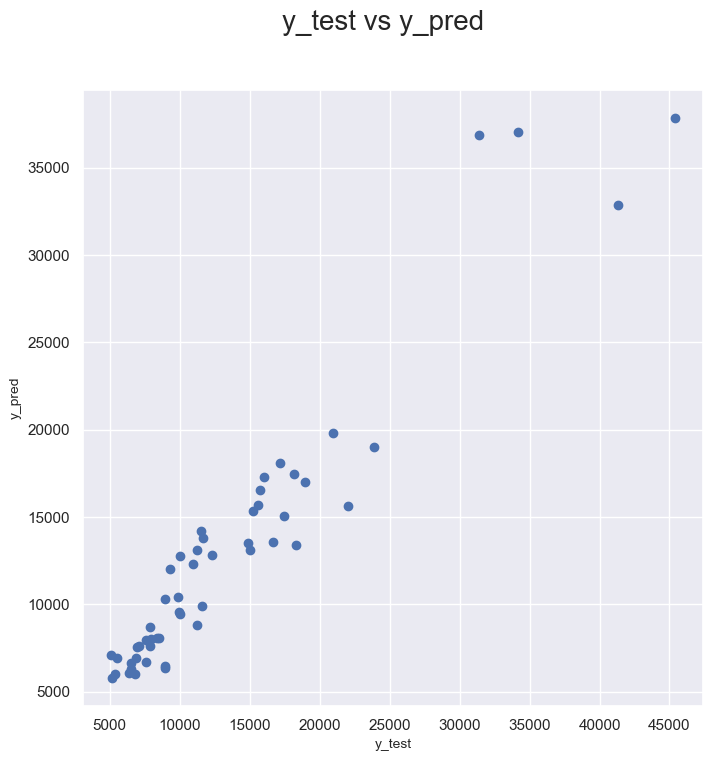

In [80]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,Rf_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=10)                          # X-label
plt.ylabel('y_pred', fontsize=10)                          # Y-label

# We can see that the equation of our best fitted line is:


# Conclusion

* We applied three models Linear Regression Decision Tree Regressor,and RandomForest Regressor
* As we can see random forest performing best (with accuracy ~ 0.90)

<img src="https://i.pinimg.com/originals/e2/d7/c7/e2d7c71b09ae9041c310cb6b2e2918da.gif">